## MNIST dataset (handwritten digits) 
* Grayscale images
* 28x28 pixels, 60K training set, 10K test set
* Output 0-9 

## Tensorboard visualization project

## Procedure
#### STEP 1 : Data pre-processing
    Load mnist dataset from keras library
    Normalize the feature values
    One-hot encoding for o/p labels 
#### STEP 2 : Model creation
    Few convolution, Pooling layers => Fully connected layers => o/p layer (softmax for multi class classification)
    Early stopping call back
#### STEP 3 : Model evaluation
    Metrics
    confusion matrix

In [152]:
import matplotlib.pyplot as plt

## STEP 1 : Data pre-processing

#### Load mnist dataset from keras library

In [153]:
from tensorflow.keras.datasets import mnist

In [154]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

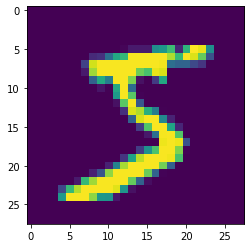

In [155]:
#Display an image from the training set
plt.imshow(x_train[0])

In [156]:
#corresponding label
y_train[0]

5

In [157]:
x_train.shape

(60000, 28, 28)

In [158]:
y_train.shape

(60000,)

#### Normalize the feature values

In [159]:
x_train.min()

0

In [160]:
x_train.max()

255

In [161]:
#normalize with grayscale intensity limits
x_train = x_train/255
x_test = x_test/255

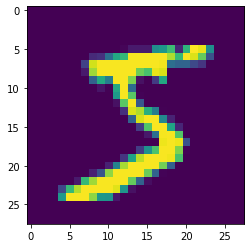

In [162]:
plt.imshow(x_train[0])

#### Reshae training and test data as per standard format

In [163]:
x_train = x_train.reshape(60000, 28, 28, 1) # single color channel
x_test = x_test.reshape(10000, 28, 28, 1) # single color channel

#### one-hot encoding for multi-class output labels

In [164]:
from tensorflow.keras.utils import to_categorical

In [165]:
y_train.shape

(60000,)

In [166]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [167]:
y_train = to_categorical(y_train) # auto derice number of classes from the data
y_train.shape

(60000, 10)

In [168]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [169]:
y_test_categorical = to_categorical(y_test) # auto derice number of classes from the data
y_test_categorical.shape

(10000, 10)

## STEP 2 : Model creation

In [170]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Flatten, Dense

#### Create CNN model

In [194]:
model = Sequential()

#i/p image size = (28, 28, 1)

# convolution layer
model.add(Conv2D(filters = 32, kernel_size = (3, 3), strides = (1,1), padding = 'valid', input_shape = x_train.shape[1:])) # o/p image shape = (26, 26, 32)
#pooling layers
model.add(MaxPooling2D(pool_size = (2,2), strides = None, padding = 'valid')) # o/p image shape = (13, 13, 32)
#Flatten the layer - Fully connected later
model.add(Flatten()) # o/p image shape = (13x13x32, 1) = (5408, 1)

#Fully connected later
model.add(Dense(units = 128, activation = 'relu'))

#o/p layer
model.add(Dense(units = 10, activation = 'softmax'))

#compile the model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

#### Model kernel summary

In [195]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               692352    
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


#### Create call back for early stopping

In [172]:
from tensorflow.keras.callbacks import EarlyStopping
cb_earlystop = EarlyStopping(monitor = 'val_loss', patience = 2)

#### Create call back for Tensorboard

In [173]:
from datetime import datetime

time_stamp = datetime.now().strftime('%y-%m-%d-%H-%m')

In [174]:
time_stamp

'20-04-17-23-04'

In [175]:
from tensorflow.keras.callbacks import TensorBoard

log_directory = "log\\02_cnn_mnist_tensorboard\\fit\\" + time_stamp

cb_tensorboard = TensorBoard(log_dir = log_directory, 
                              histogram_freq = 1,
                              write_graph = True,
                              write_images = True,
                              update_freq = 'epoch',
                              profile_batch = 2,
                              embeddings_freq = 1 )


#### Train the model

In [176]:
model.fit(x_train, y_train, batch_size = 128, epochs = 20, validation_data = (x_test, y_test_categorical), callbacks = [cb_earlystop, cb_tensorboard])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 21s 354us/sample - loss: 0.2368 - accuracy: 0.9317 - val_loss: 0.1091 - val_accuracy: 0.9671
Epoch 2/20
60000/60000 [==============================] - 22s 366us/sample - loss: 0.0825 - accuracy: 0.9754 - val_loss: 0.0654 - val_accuracy: 0.9793
Epoch 3/20
60000/60000 [==============================] - 23s 379us/sample - loss: 0.0526 - accuracy: 0.9838 - val_loss: 0.0554 - val_accuracy: 0.9814
Epoch 4/20
60000/60000 [==============================] - 19s 322us/sample - loss: 0.0360 - accuracy: 0.9892 - val_loss: 0.0501 - val_accuracy: 0.9839
Epoch 5/20
60000/60000 [==============================] - 19s 316us/sample - loss: 0.0259 - accuracy: 0.9918 - val_loss: 0.0502 - val_accuracy: 0.9844
Epoch 6/20
60000/60000 [==============================] - 21s 344us/sample - loss: 0.0182 - accuracy: 0.9947 - val_loss: 0.0507 - val_accuracy: 0.9840


In [177]:
import numpy as np
import pandas as pd
import seaborn as sns

In [178]:
model_history = pd.DataFrame(model.history.history)

In [179]:
model_history

,loss,accuracy,val_loss,val_accuracy
0,0.236847,0.931700,0.109136,0.9671
1,0.082450,0.975350,0.065377,0.9793
2,0.052587,0.983767,0.055425,0.9814
3,0.035986,0.989233,0.050088,0.9839
4,0.025938,0.991767,0.050229,0.9844
5,0.018171,0.994683,0.050732,0.9840


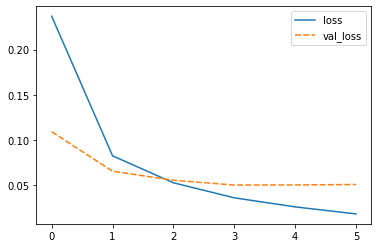

In [180]:
# Plot loss metric
sns.lineplot(data = model_history[['loss', 'val_loss']])

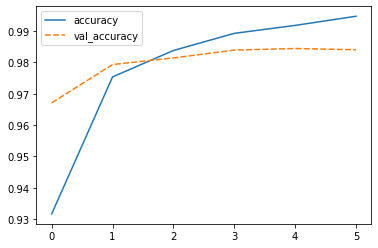

In [181]:
# Plot accuracy metric
sns.lineplot(data = model_history[['accuracy', 'val_accuracy']])

## STEP 3 : Model evaluation

#### Predict classes

In [182]:
model.evaluate(x_test, y_test_categorical, verbose = 0)

[0.05073203294586856, 0.984]

In [183]:
y_pred = model.predict_classes(x_test)

In [184]:
y_pred.shape

(10000,)

In [185]:
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

#### Evaluation metrics

In [186]:
from sklearn.metrics import confusion_matrix, classification_report

In [187]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.99      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.98      0.99       892
           6       0.98      0.98      0.98       958
           7       0.97      0.99      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [188]:
confusion_matrix(y_test, y_pred)

array([[ 971,    0,    2,    0,    0,    2,    3,    1,    1,    0],
       [   0, 1128,    4,    0,    0,    1,    2,    0,    0,    0],
       [   1,    2, 1017,    2,    1,    0,    2,    5,    2,    0],
       [   0,    0,    5,  997,    0,    1,    0,    3,    3,    1],
       [   0,    1,    3,    0,  965,    0,    2,    1,    1,    9],
       [   2,    0,    1,    6,    0,  876,    4,    1,    2,    0],
       [   5,    2,    1,    1,    1,    4,  943,    0,    1,    0],
       [   1,    2,   10,    0,    0,    0,    0, 1013,    1,    1],
       [   5,    0,    2,    3,    2,    0,    3,    4,  949,    6],
       [   2,    2,    0,    3,    5,    1,    2,   12,    1,  981]],
      dtype=int64)

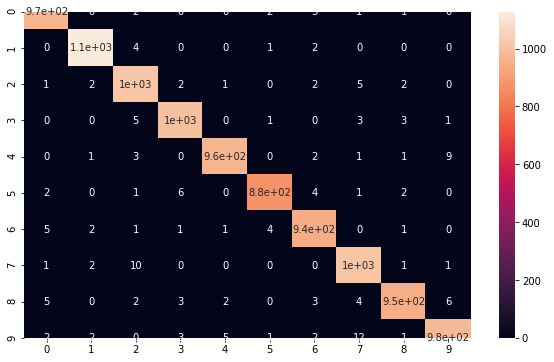

In [189]:
plt.figure(figsize = (10,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)

#### Predicting output for new input image

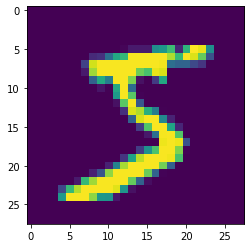

In [190]:
x_image = x_train[0].reshape(28, 28)
plt.imshow(x_image)

In [191]:
y_pred_image = model.predict_classes(x_image.reshape(1, 28, 28, 1))

In [192]:
y_pred_image

array([5], dtype=int64)

## View tensorboard visualizations:
Run tensorboard command along with valid log folder directory name

#### Good bye !!